In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib import colors as mcolors
from IPython.display import HTML, Image
from matplotlib.ticker import FormatStrFormatter
# sns.set_style('whitegrid')

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [3]:
normal_effect = lambda ti, x, a, mu, sigma: a * np.exp(-(np.power((x-mu-ti)/sigma, 2)))
gamma_effect = lambda x: ((1/1.16) * 0.1 *
                          (x ** (2.5 - 1)) * np.exp(-1.0 * x))
normal_bump = lambda x, a, mu, sigma: a * np.exp(-(np.power((x-mu)/sigma, 2)))


f_fnc = lambda x: np.exp(-0.05 * x)

def f_joint(x, t):
    baseline = f_fnc(x)
    sigma = 0.4
    a = 0.4
    mu = 0.8
    for ti in t:
        baseline += normal_effect(ti, x, a, mu, sigma)
    return baseline

lamb_fnc = lambda x: 0.4 * normal_bump(x, a=1.0, mu=1.5, sigma=1.0) + 0.6 * normal_bump(x, a=1.0, mu=3.5, sigma=1.0) + 0.4 * normal_bump(x, a=1.0, mu=6.5, sigma=1.0) + 0.6 * normal_bump(x, a=1.0, mu=8.5, sigma=1.0)
lamb_cf_fnc = lambda x: 0.75 * normal_bump(x, a=1.0, mu=2.5, sigma=1.0) + 0.75 * normal_bump(x, a=1.0, mu=7.5, sigma=1.0)

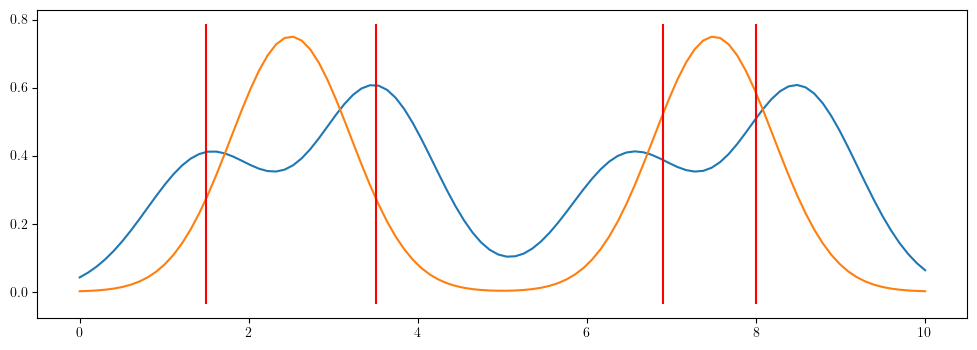

In [4]:
action_obs = [1.5, 3.5, 6.9, 8.0]
xx = np.linspace(0.0, 10.0, 100)
fb = f_fnc(xx)
plt.figure(figsize=(12,4))
plt.plot(xx, lamb_fnc(xx))
plt.plot(xx, lamb_cf_fnc(xx))
ylim = plt.gca().get_ylim()
plt.vlines(action_obs, *ylim, color='red')
plt.show()

In [5]:
xx_int = np.linspace(10.0, 15.0, 50)
lambda_int_fnc = lambda x: 0.75 * normal_bump(x, a=1.0, mu=12.5, sigma=1.0)
lambda_int = lambda_int_fnc(xx_int)

In [6]:
lambda_obs = lamb_fnc(xx)
lambda_cf = lamb_cf_fnc(xx)

In [7]:
np.random.seed(2)

action_obs = [1.5, 3.5, 5.0, 6.9, 8.0]
action_obs2 = [2.5, 7.5]
ff = f_joint(xx, action_obs)
ff2 = f_joint(xx, action_obs2)
nn = np.random.randn(*xx.shape) * 0.06
nn2 = np.random.randn(*xx.shape) * 0.06
yy = ff + nn
yy2 = ff2 + nn2
idx = np.random.choice(len(xx), 30)

np.random.seed(2)
idx2 = np.random.choice(len(xx), 30)
X_obs = xx[idx]
Y_obs = yy[idx]
X_obs2 = xx[idx2]
Y_obs2 = yy2[idx2]

action_int = [12.5]
ff_int = f_joint(xx_int, action_int)
nn_int = np.random.randn(*xx_int.shape) * 0.06
yy_int = ff_int + nn_int
idx_int = np.random.choice(len(xx_int), 12)
X_int = xx_int[idx_int]
Y_int = yy_int[idx_int]

action_cf = [1.5, 2.8, 6.9, 7.5, 8.0]
ff_cf = f_joint(xx, action_cf)
yy_cf = ff_cf + nn
X_cf = xx[idx]
Y_cf = yy_cf[idx]

lambda_obs = lamb_fnc(xx)
lambda_cf = lamb_cf_fnc(xx)

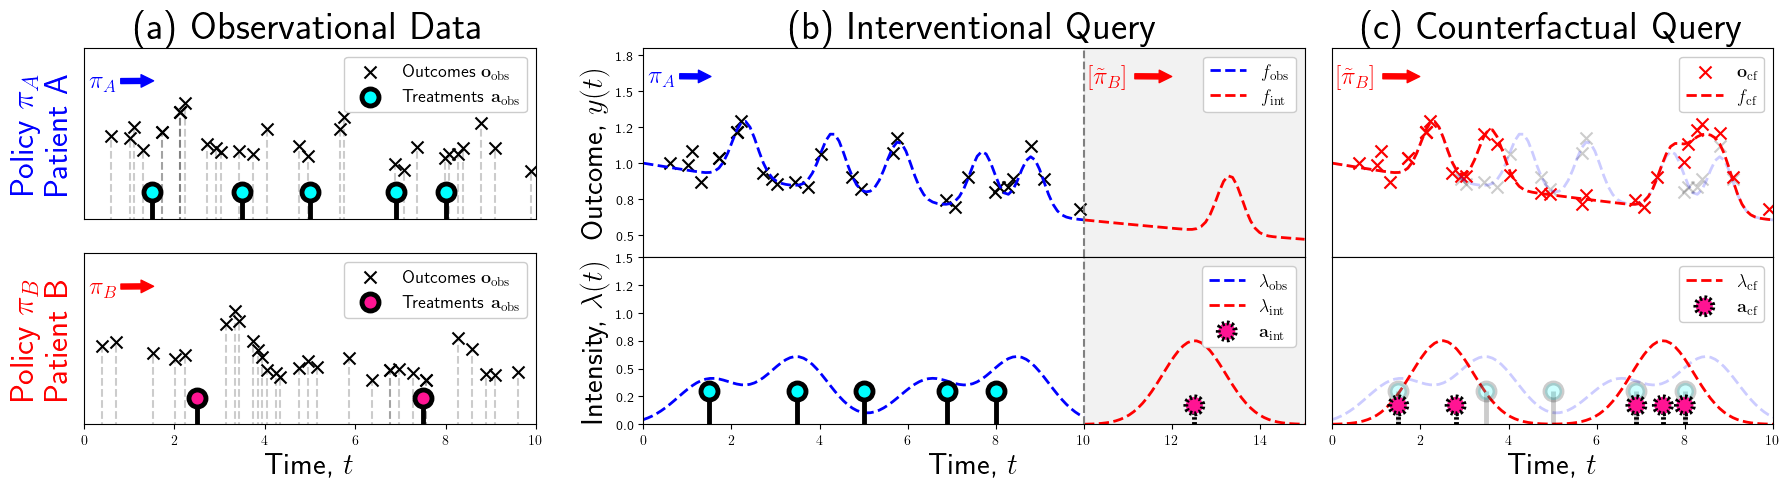

In [8]:
LW = 3.5

alpha = 0.2



#make outer gridspec
fs_legend = 13
fs_label = 22
lw = 2.0
ss = 75

import matplotlib.gridspec as gridspec
outer = gridspec.GridSpec(1, 2, width_ratios = [1.2, 2.5], hspace=0.0)
#make nested gridspecs
outer0 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[0], wspace=0.0, width_ratios = [1.0, 0.2])
gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer0[0], wspace=0.03, height_ratios = [1, 1])
outer1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace=0.05, width_ratios = [1.5, 1])
gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer1[0], hspace=0.0, height_ratios = [1.25, 1])
# gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], hspace=0.0, width_ratios = [2.75, 1])
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer1[1], hspace=0.0, height_ratios = [1.25, 1])


fig = plt.figure(figsize=(18, 5))

ax_a_top = ax_obs_A = fig.add_subplot(gs0[0])
ax_a_bottom = ax_obs_B = fig.add_subplot(gs0[1])

def plot_treatment(ax, action, y, color, label='', linestyle='-', alpha=1.0):
    ax.vlines(action, 0.0, y, color='black', linewidth=LW, alpha=alpha, linestyle=linestyle)
    ax.scatter(action, [y] * len(action), marker='o', edgecolor='black', linewidth=LW, facecolor=color, s=150, alpha=alpha, linestyle=linestyle, label=label, zorder=2)

def annotate_policy(ax, label, x1, x2, y, color, yshift=-0.04):
    ax.annotate(label, xy=(x2, y), xytext=(x1, y + yshift), color=color,
             arrowprops=dict(color=color, arrowstyle='simple', connectionstyle='arc3'),
             fontsize=18)

def obsplot(ax, X_obs, Y_obs, action_obs, patientlabel, patientcolor, treatmentcolor):
    # Outcomes
    ax.scatter(X_obs, Y_obs, marker='x', color='black', label=r"Outcomes $\mathbf{o}_\mathrm{obs}$", s=ss)
    ax.vlines(X_obs, 0.0, Y_obs - 0.015, color='black', linestyles="--", linewidth=LW-2, alpha=0.2)

    # Treatments
    plot_treatment(ax, action_obs, 0.49, treatmentcolor, label=r'Treatments $\mathbf{a}_\mathrm{obs}$')
    
    ax.set_yticks([])
    ylim = (0.25, 1.8)
    ax.set_ylim(*ylim)
    ax.legend(loc='upper right', fontsize=fs_legend, framealpha=1.0)
    
    annotate_policy(ax, f"$\\pi_{patientlabel}$", 0.1, 1.6, ylim[1] - 0.3, patientcolor, -0.06)
    ax.set_ylabel(f'Policy $\\pi_{patientlabel}$' + '\n' + f'Patient {patientlabel}', fontsize=fs_label+2)
    ax.yaxis.label.set_color(patientcolor)
    # ax.spines['bottom'].set_color(patientcolor)

ax_a_top.set_title('(a) Observational Data', fontsize=28)

obsplot(ax_obs_A, X_obs, Y_obs, action_obs, "A", "blue", "cyan")
obsplot(ax_obs_B, X_obs2, Y_obs2, action_obs2, "B", "red", "deeppink")


xlim_int = (0, 15)
xlim_obs = xlim_cf = (0, 10)
ylim_y = (0.35, 1.8)
ylim_lam = (0, 1.5)

ax_b_top = ax_int_y = fig.add_subplot(gs1[0])
ax_b_bottom = ax_int_lam = fig.add_subplot(gs1[1])

ax_c_top = ax_cf_y = fig.add_subplot(gs2[0])
ax_c_bottom = ax_cf_lam = fig.add_subplot(gs2[1])

for ax in [ax_a_top, ax_a_bottom, ax_c_top, ax_c_bottom]:
    ax.set_xlim(xlim_obs)  # == xlim_cf

for ax in [ax_b_top, ax_b_bottom]:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim(xlim_int)

for ax in [ax_int_y, ax_cf_y]:
    ax.set_ylim(ylim_y)

for ax in [ax_int_lam, ax_cf_lam]:
    ax.set_ylim(ylim_lam)

for ax in [ax_a_top, ax_b_top, ax_c_top]:
    ax.set_xticks([])

for ax in [ax_cf_y, ax_cf_lam]:
    ax.set_yticks([])

for ax in [ax_a_bottom, ax_b_bottom, ax_c_bottom]:
    xlim = ax.get_xlim()
    ax.set_xticks(np.arange(xlim[0], xlim[1]+0.1, 2), fontsize=fs_legend)
    ax.set_xlabel(r'Time, $t$', fontsize=fs_label)

ax_int_y.set_ylabel(r'Outcome, $y(t)$', fontsize=fs_label)
ax_int_lam.set_ylabel('Intensity, $\lambda(t)$', fontsize=fs_label)


ax_b_top.set_title('(b) Interventional Query', fontsize=28)
annotate_policy(ax_b_top, r"$\pi_A$", 0.1, 1.6, ax_b_top.get_ylim()[1] - 0.2, "blue")
annotate_policy(ax_b_top, r"$[\tilde{\pi}_B]$", 10.1, 12.05, ax_b_top.get_ylim()[1] - 0.2, "red")

ax_int_y.scatter(X_obs, Y_obs, marker='x', color='black', s=ss)
# ax_int_y.plot(X_int, Y_int, 'rx', label=r"$\mathbf{o}_\mathrm{int}$", markersize=8)
ax_int_y.plot(xx, ff, 'b--', lw=lw, label=r'$f_\mathrm{obs}$')
ax_int_y.plot(xx_int, ff_int, 'r--', lw=lw, label=r'$f_\mathrm{int}$')
ax_int_y.legend(loc='upper right', fontsize=fs_legend, framealpha=1.0)

ax_int_lam.plot(xx, lambda_obs, 'b--', lw=lw, label=r'$\lambda_\mathrm{obs}$')
ax_int_lam.plot(xx_int, lambda_int, 'r--', lw=lw, label=r'$\lambda_\mathrm{int}$')
plot_treatment(ax_int_lam, action_obs, 0.30, "cyan")
plot_treatment(ax_int_lam, action_int, 0.17, "deeppink", label=r'$\mathbf{a}_\mathrm{int}$', linestyle=(0, (0.5, 0.5)))
ax_int_lam.legend(loc='upper right', fontsize=fs_legend, framealpha=1.0)

for ax in [ax_b_top, ax_b_bottom]:
    ax.vlines(10.0, *ax.get_ylim(), linestyle="--", color="grey")
    ax.axvspan(10.0, 15.0, color="grey", alpha=0.1)


ax_c_top.set_title('(c) Counterfactual Query', fontsize=28)
annotate_policy(ax_c_top, r"$[\tilde{\pi}_B]$", 0.1, 2.05, ax_c_top.get_ylim()[1] - 0.2, "red")

ax_cf_y.scatter(X_obs, Y_obs, marker='x', color='black', s=ss, alpha=alpha)
ax_cf_y.scatter(X_cf, Y_cf, marker='x', color='red', label=r"$\mathbf{o}_\mathrm{cf}$", s=ss)
ax_cf_y.plot(xx, ff, 'b--', lw=lw, alpha=alpha)
ax_cf_y.plot(xx, ff_cf, 'r--', lw=lw, label=r'$f_\mathrm{cf}$')
ax_cf_y.legend(loc='upper right', fontsize=fs_legend, framealpha=1.0)

ax_cf_lam.plot(xx, lambda_obs, 'b--', lw=lw, alpha=alpha)
ax_cf_lam.plot(xx, lambda_cf, 'r--', lw=lw, label=r'$\lambda_\mathrm{cf}$')
plot_treatment(ax_cf_lam, action_obs, 0.30, "cyan", alpha=alpha)
plot_treatment(ax_cf_lam, action_cf, 0.17, "deeppink", label=r'$\mathbf{a}_\mathrm{cf}$', linestyle=(0, (0.5, 0.5)))
ax_cf_lam.legend(loc='upper right', fontsize=fs_legend, framealpha=1.0)


plt.tight_layout()
plt.savefig('figures/paper/figure1_v9.pdf')
plt.show()